# Clustering songs through K-Means unsupervised learning

### Getting and visualizing data

In [191]:
import pandas as pd

In [192]:
from sklearn import datasets

In [193]:
data = pd.read_csv('top_brazil.csv')
data.head()

,Unnamed: 0,title,performed_by,genre_a,genre,danceability,energy,key,loudness,mode,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0,Pingo de dó,Hugo & Guilherme,1,sertanejo,0.522,0.738,0,-4.480,0,...,0.6520,0.608,129.685,audio_features,1a17gIb57XhPj2CMbqYABw,spotify:track:1a17gIb57XhPj2CMbqYABw,https://api.spotify.com/v1/tracks/1a17gIb57XhP...,https://api.spotify.com/v1/audio-analysis/1a17...,161840,4
1,1,Troca,Jorge & Matheus,1,sertanejo,0.758,0.697,1,-4.103,1,...,0.0887,0.810,94.980,audio_features,6HV630GY0GT3RN2efFRmbP,spotify:track:6HV630GY0GT3RN2efFRmbP,https://api.spotify.com/v1/tracks/6HV630GY0GT3...,https://api.spotify.com/v1/audio-analysis/6HV6...,171264,4
2,2,Foto nao é fato,Diego & Victor Hugo,1,sertanejo,0.541,0.863,11,-3.931,0,...,0.2980,0.745,156.877,audio_features,5QEpLMQPyCB9UCzdOKG3uW,spotify:track:5QEpLMQPyCB9UCzdOKG3uW,https://api.spotify.com/v1/tracks/5QEpLMQPyCB9...,https://api.spotify.com/v1/audio-analysis/5QEp...,166760,4
3,3,Sua cama nao explica nada,"Hugo & Vitor, Marcos & Belutti",1,sertanejo,0.534,0.895,1,-4.217,1,...,0.3930,0.612,160.120,audio_features,0UoxMEhVm61u9ZLD4iDu83,spotify:track:0UoxMEhVm61u9ZLD4iDu83,https://api.spotify.com/v1/tracks/0UoxMEhVm61u...,https://api.spotify.com/v1/audio-analysis/0Uox...,175103,4
4,4,Batom de cereja,Israel & Rodolffo,1,sertanejo,0.606,0.908,6,-6.201,0,...,0.1900,0.798,171.966,audio_features,2MZQAvsA7aZDssppBLRxYp,spotify:track:2MZQAvsA7aZDssppBLRxYp,https://api.spotify.com/v1/tracks/2MZQAvsA7aZD...,https://api.spotify.com/v1/audio-analysis/2MZQ...,140942,4


In [194]:
data.keys()

Index(['Unnamed: 0', 'title', 'performed_by', 'genre_a', 'genre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'],
      dtype='object')

In [195]:
data['id']

0      1a17gIb57XhPj2CMbqYABw
1      6HV630GY0GT3RN2efFRmbP
2      5QEpLMQPyCB9UCzdOKG3uW
3      0UoxMEhVm61u9ZLD4iDu83
4      2MZQAvsA7aZDssppBLRxYp
                ...          
230    1XXimziG1uhM0eDNCZCrUl
231    3tjFYV6RSFtuktYl3ZtYcq
232    6tDDoYIxWvMLTdKpjFkc1B
233    61KpQadow081I2AsbeLcsb
234    3H7ihDc1dqLriiWXwsc2po
Name: id, Length: 235, dtype: object

In [196]:
data['id'].shape

(235,)

In [197]:
X = data.drop(columns=['id', 'Unnamed: 0', 'type', 'key', 'tempo','uri', 'time_signature', 'mode', 'track_href', 'analysis_url', 'duration_ms', 'title', 'performed_by', 'genre'])
y = pd.DataFrame(data['id'])

In [199]:
X.head()

,genre_a,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
0,1,0.522,0.738,-4.480,0.1170,0.685,0.0,0.6520,0.608
1,1,0.758,0.697,-4.103,0.0347,0.647,0.0,0.0887,0.810
2,1,0.541,0.863,-3.931,0.1690,0.149,0.0,0.2980,0.745
3,1,0.534,0.895,-4.217,0.0579,0.431,0.0,0.3930,0.612
4,1,0.606,0.908,-6.201,0.0565,0.556,0.0,0.1900,0.798


### The model

In [200]:
from sklearn.preprocessing import StandardScaler
X_prep = StandardScaler().fit_transform(X)

In [201]:
# dataframe of scaled features
X_prep_df = pd.DataFrame(X_prep)

In [231]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=20, random_state=1234)
kmeans.fit(X_prep_df)

KMeans(n_clusters=20, random_state=1234)

In [232]:
kmeans.cluster_centers_

array([[ 6.12527883e-01, -3.68144868e-01, -3.73110890e-01,
        -7.28080326e-01, -4.87273380e-01,  9.21980396e-01,
        -1.46895748e-01, -4.83960589e-01,  3.92500381e-01],
       [-1.20046987e+00, -1.66835498e-01,  6.83410252e-01,
         7.07134232e-01, -3.06254384e-01, -2.54286910e-01,
        -9.29101337e-02,  1.24354159e+00, -3.44538751e-01],
       [-5.54077510e-01,  1.05950421e+00, -8.67209053e-01,
         4.98267330e-01, -2.90062506e-01, -9.78523292e-02,
        -1.10688584e-01, -6.83142721e-01,  4.61854897e-01],
       [ 4.99630587e-01,  1.57119749e+00, -6.25877307e-01,
         9.60191351e-01,  5.58499778e-01, -9.54411342e-01,
         1.02978768e+01, -9.60198303e-01, -7.73131026e-02],
       [ 4.99630587e-01, -1.13664401e-01,  7.43394484e-01,
        -7.32116287e-01, -5.08549934e-01,  5.75122439e-01,
        -1.48037110e-01,  1.42021534e+00,  1.04968627e+00],
       [-2.13517345e-03,  9.46898573e-01, -8.52965866e-01,
         4.87302048e-01,  2.55696503e+00,  7.876533

### Assessing the optimality of no. of clusters

In [233]:
# total inertia of all the centroids
kmeans.inertia_

581.7015823567956

In [234]:
clusters = kmeans.predict(X_prep)
clusters

array([ 1, 17, 19, 19, 17,  1,  1, 19,  1,  6, 17,  2, 17,  6,  6,  6, 19,
        6, 17, 19,  6, 19,  1, 17,  1, 17,  6, 13, 17, 12,  1,  6, 19, 17,
       17,  1, 19, 17, 19, 19, 19,  1, 19,  2, 12, 12,  6,  6,  6,  1,  6,
       17, 19,  1,  6,  1,  6,  1,  6, 12, 17,  1,  1, 19, 12, 14,  2,  5,
        2, 17,  2,  8,  5,  9,  9, 15, 13,  2, 12,  2,  5,  8, 13, 14,  3,
        5, 10, 10, 14,  5,  6, 19, 10,  5,  6,  2, 14,  5,  2,  1,  2, 13,
        2, 10,  6, 10,  2,  1,  6, 10, 12, 14,  8, 19, 10,  9,  7,  7,  7,
        0,  7,  0,  0,  7,  8,  0,  7,  0,  4,  0,  0,  4,  0,  0,  7,  0,
        0,  7,  7,  0,  0,  0,  0, 11, 15,  7,  7,  4,  4,  4,  7,  7, 18,
        7,  7,  7,  7,  0,  0,  4,  7,  7,  7,  7,  7,  7,  4,  7,  7,  0,
        7,  0,  7,  7,  9,  0,  7,  4,  7,  4,  7,  7,  7,  4,  0, 11,  8,
        8, 18, 11, 16,  8, 11,  8, 11,  8,  9,  8,  0,  8, 18, 11,  5, 11,
       18, 10, 11,  8,  8, 11, 16,  3, 18, 11, 18, 11,  0, 10,  5,  8, 16,
        8, 11, 10,  8, 15

In [235]:
pd.Series(clusters).value_counts().sort_index()

0     24
1     17
2     12
3      2
4     10
5      9
6     19
7     33
8     18
9      5
10    12
11    13
12     7
13     4
14     5
15     4
16     3
17    14
18     8
19    16
dtype: int64

In [236]:
kmeans.cluster_centers_

array([[ 6.12527883e-01, -3.68144868e-01, -3.73110890e-01,
        -7.28080326e-01, -4.87273380e-01,  9.21980396e-01,
        -1.46895748e-01, -4.83960589e-01,  3.92500381e-01],
       [-1.20046987e+00, -1.66835498e-01,  6.83410252e-01,
         7.07134232e-01, -3.06254384e-01, -2.54286910e-01,
        -9.29101337e-02,  1.24354159e+00, -3.44538751e-01],
       [-5.54077510e-01,  1.05950421e+00, -8.67209053e-01,
         4.98267330e-01, -2.90062506e-01, -9.78523292e-02,
        -1.10688584e-01, -6.83142721e-01,  4.61854897e-01],
       [ 4.99630587e-01,  1.57119749e+00, -6.25877307e-01,
         9.60191351e-01,  5.58499778e-01, -9.54411342e-01,
         1.02978768e+01, -9.60198303e-01, -7.73131026e-02],
       [ 4.99630587e-01, -1.13664401e-01,  7.43394484e-01,
        -7.32116287e-01, -5.08549934e-01,  5.75122439e-01,
        -1.48037110e-01,  1.42021534e+00,  1.04968627e+00],
       [-2.13517345e-03,  9.46898573e-01, -8.52965866e-01,
         4.87302048e-01,  2.55696503e+00,  7.876533

In [237]:
X_df = pd.DataFrame(X)
X_df['cluster'] = clusters
X_df.head()

,genre_a,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,cluster
0,1,0.522,0.738,-4.480,0.1170,0.685,0.0,0.6520,0.608,1
1,1,0.758,0.697,-4.103,0.0347,0.647,0.0,0.0887,0.810,17
2,1,0.541,0.863,-3.931,0.1690,0.149,0.0,0.2980,0.745,19
3,1,0.534,0.895,-4.217,0.0579,0.431,0.0,0.3930,0.612,19
4,1,0.606,0.908,-6.201,0.0565,0.556,0.0,0.1900,0.798,17


<AxesSubplot:ylabel='Frequency'>

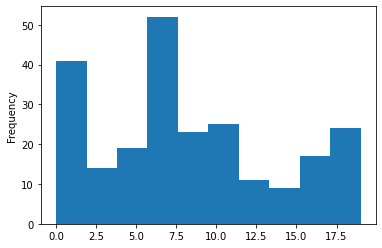

In [238]:
X_df['cluster'].plot(kind='hist')

```python
def get_inertia(n_clusters):
    kmeans = KMeans(n_clusters=8, random_state=1234)
    
    # train your model here
    # calculate an inertia
    reture kmeans.inertia
    
cluster_range = range(1,11)

dct = {cluster_number:get_inertia(cluster_number) for cluster_number in cluster_range}

```

C:\Users\kaypa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia')

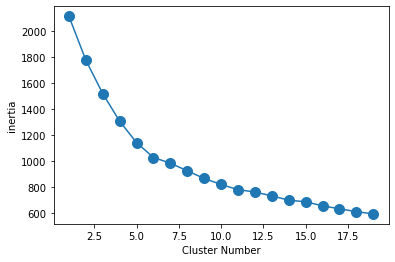

In [239]:
# I want to iterate over a range of n_clusters and for every value, I want to return the inertia
def get_kmeans_inertia_varying_cluster_n(n_clusters):
    
    # setup the model
    kmeans = KMeans(n_clusters=n_clusters,
                    random_state=1234,
                    n_init=3,
                    #algorithm='elkan',
                   )
    # train the model
    kmeans.fit(X_prep_df)
    
    # return the resulting inertia
    return kmeans.inertia_

# Plot for a range of cluster numbers
import matplotlib.pyplot as plt

cluster_range = range(1,20)

plt.plot(cluster_range,
         [get_kmeans_inertia_varying_cluster_n(c_number) for c_number in cluster_range],
         marker="o",
         ms=10,
        )
plt.xlabel('Cluster Number')
plt.ylabel('inertia')

Text(0, 0.5, 'inertia')

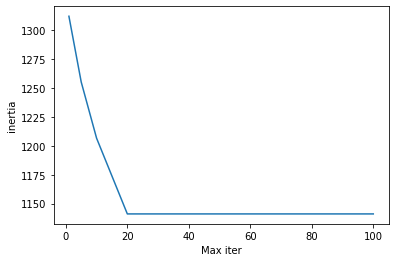

In [213]:
# I want to iterate over a range of mx_iter and for every value, I want to return the inertia
def get_kmeans_ineratia_varying_max_iter(max_iter):
    kmeans = KMeans(n_clusters=5,
                    random_state=1234,
                    n_init=3,
                    algorithm='elkan',
                    max_iter=max_iter,
                   )
    kmeans.fit(X_prep_df)

    return kmeans.inertia_

max_iter_list = [1, 5, 10, 20, 30, 40, 50, 100]

plt.plot(max_iter_list,
         [get_kmeans_ineratia_varying_max_iter(x) for x in max_iter_list],
        )
plt.xlabel('Max iter')
plt.ylabel('inertia')

In [240]:
from sklearn.metrics import silhouette_score

K = range(2, 20)

silhouettes = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                   random_state=1234)
    kmeans.fit(X_prep)
    silhouettes.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


Text(0, 0.5, 'silhouette score')

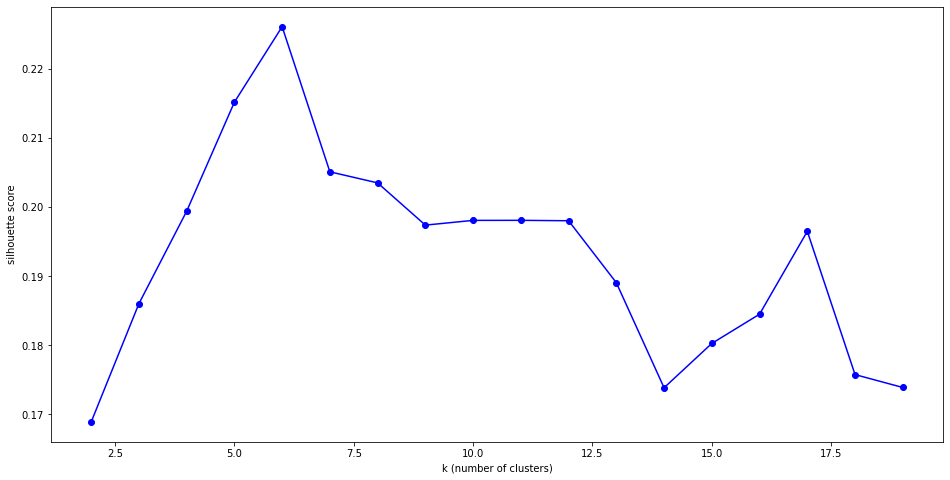

In [241]:
import matplotlib.pyplot as plt


plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bo-')
plt.xlabel('k (number of clusters)')
plt.ylabel('silhouette score')

### Visualizing results

In [242]:
kmeans = KMeans(n_clusters=20,
             random_state=1234)

kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)
clusters

array([ 1, 17, 19, 19, 17,  1,  1, 19,  1,  6, 17,  2, 17,  6,  6,  6, 19,
        6, 17, 19,  6, 19,  1, 17,  1, 17,  6, 13, 17, 12,  1,  6, 19, 17,
       17,  1, 19, 17, 19, 19, 19,  1, 19,  2, 12, 12,  6,  6,  6,  1,  6,
       17, 19,  1,  6,  1,  6,  1,  6, 12, 17,  1,  1, 19, 12, 14,  2,  5,
        2, 17,  2,  8,  5,  9,  9, 15, 13,  2, 12,  2,  5,  8, 13, 14,  3,
        5, 10, 10, 14,  5,  6, 19, 10,  5,  6,  2, 14,  5,  2,  1,  2, 13,
        2, 10,  6, 10,  2,  1,  6, 10, 12, 14,  8, 19, 10,  9,  7,  7,  7,
        0,  7,  0,  0,  7,  8,  0,  7,  0,  4,  0,  0,  4,  0,  0,  7,  0,
        0,  7,  7,  0,  0,  0,  0, 11, 15,  7,  7,  4,  4,  4,  7,  7, 18,
        7,  7,  7,  7,  0,  0,  4,  7,  7,  7,  7,  7,  7,  4,  7,  7,  0,
        7,  0,  7,  7,  9,  0,  7,  4,  7,  4,  7,  7,  7,  4,  0, 11,  8,
        8, 18, 11, 16,  8, 11,  8, 11,  8,  9,  8,  0,  8, 18, 11,  5, 11,
       18, 10, 11,  8,  8, 11, 16,  3, 18, 11, 18, 11,  0, 10,  5,  8, 16,
        8, 11, 10,  8, 15

In [243]:
clusters.shape

(235,)

In [244]:
songs_clustered = pd.DataFrame(X_prep)

In [245]:
songs_clustered['cluster_id'] = clusters

In [246]:
songs_clustered.head()

,0,1,2,3,4,5,6,7,8,cluster_id
0,-1.306726,-1.089111,0.262416,0.389628,0.199076,1.228791,-0.148037,0.933510,-0.356574,1
1,-1.306726,0.669524,-0.033682,0.568285,-0.715316,1.065159,-0.148037,-0.842147,0.760471,17
2,-1.306726,-0.947526,1.165153,0.649794,0.776821,-1.079289,-0.148037,-0.182383,0.401026,19
3,-1.306726,-0.999689,1.396254,0.514261,-0.457553,0.135037,-0.148037,0.117080,-0.334455,19
4,-1.306726,-0.463156,1.490139,-0.425936,-0.473108,0.673302,-0.148037,-0.522825,0.694112,17


In [247]:
songs_clustered.to_csv('songs_clustered2.csv', index = True)

In [221]:
songs_clustered['cluster_id'].value_counts()

0    75
3    50
4    46
1    42
5    20
2     2
Name: cluster_id, dtype: int64

In [153]:
kmeans.cluster_centers_

array([[ 1.51388369e-01,  1.13062361e+00,  1.15399744e+00,
         1.75934026e-02, -7.50956597e-01, -1.43420940e-01,
        -4.22101173e-01,  4.42500148e-01],
       [-2.03921556e-02, -1.68990356e+00, -1.79591187e+00,
         1.17506635e-01,  9.11573939e-01,  9.00079845e-02,
        -2.80575471e-01, -1.48283652e+00],
       [-8.29532914e-03,  8.56056087e-01,  4.78283400e-01,
        -3.29826884e-01, -1.99462405e-01, -1.10535059e-01,
         1.10183915e+00, -1.99124478e-02],
       [-2.76088900e-01, -3.53686476e-01, -1.36144384e-01,
        -4.42496263e-01, -1.25743894e+00, -1.40422741e-01,
        -6.32425181e-01, -1.03179778e+00],
       [-3.34156180e-01, -2.46968411e-01, -1.21604139e-01,
        -3.10721811e-01,  8.02198494e-01, -1.41140502e-01,
        -5.26369593e-01,  3.11317963e-01],
       [ 1.57119749e+00, -6.25877307e-01,  9.60191351e-01,
         5.58499778e-01, -9.54411342e-01,  1.02978768e+01,
        -9.60198303e-01, -7.73131026e-02],
       [-9.62961688e-01,  2.815025